# Table of Contents
1. [1996-2005 Model](#1996-2005)
2. [Section 1 Model](#Section-1-latedate-2monthurea)
3. [8/1/2015-on Model](#8/1/15-on)
4. [Green Markets Model](#Green-Markets)
5. [Temperature and Precipitation Included in Model](#Temp-and-precipitation-included)

# Original CSV

In [1]:
#make sure data loaded correctly
import bokeh.plotting as bkh
bkh.output_notebook()
import pandas as pd

original = pd.read_csv("C:/Users/msteinme/Documents/project1revisit2.csv")
print (original.shape)
original.tail()


BokehJS successfully loaded.

(3653, 13)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,earlydate,dollar,crude,corn,urea,latestdate,crude.1,urea.1
3648,NaN,NaN,NaN,NaN,NaN,12/27/05,91.19,58.68,224.25,325,NaN,NaN,NaN
3649,NaN,NaN,NaN,NaN,NaN,12/28/05,91.21,60.36,225.00,325,NaN,NaN,NaN
3650,NaN,NaN,NaN,NaN,NaN,12/29/05,91.10,60.92,220.00,325,NaN,NaN,NaN
3651,NaN,NaN,NaN,NaN,NaN,12/30/05,91.17,61.90,225.00,325,NaN,NaN,NaN
3652,NaN,NaN,NaN,NaN,NaN,12/31/05,91.17,61.90,225.00,325,NaN,NaN,NaN


## 1996-2005
[Top](#Table-of-Contents)

In [2]:
sectionold = original[['earlydate', 'dollar','crude','corn', 'urea']]
sectionold.tail()

,earlydate,dollar,crude,corn,urea
3648,12/27/05,91.19,58.68,224.25,325
3649,12/28/05,91.21,60.36,225.00,325
3650,12/29/05,91.10,60.92,220.00,325
3651,12/30/05,91.17,61.90,225.00,325
3652,12/31/05,91.17,61.90,225.00,325


In [3]:
sectionold.describe()

,dollar,crude,corn,urea
count,3653.000000,3653.000000,3653.000000,3653.000000
mean,98.785749,28.608995,247.887216,187.880099
std,10.270574,12.380077,49.293976,54.378359
min,80.530000,11.020000,182.500000,105.000000
25%,89.140000,20.110000,217.250000,135.000000
50%,98.400000,26.300000,231.500000,180.000000
75%,106.140000,31.740000,265.750000,220.000000
max,120.900000,69.980000,504.500000,340.000000


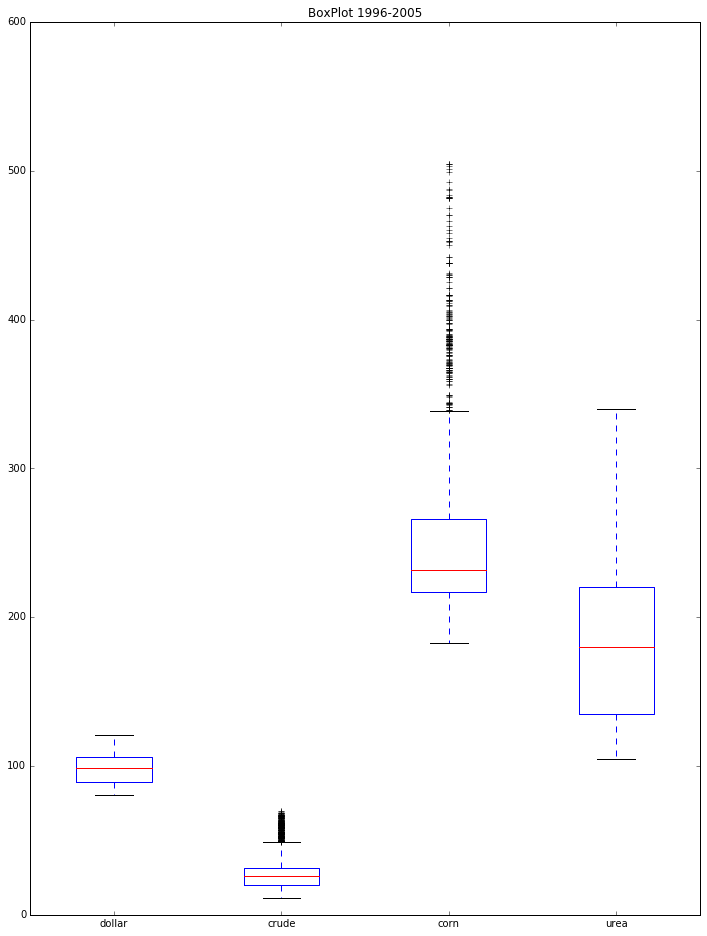

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show(sectionold.plot(kind='box', figsize=(12,16),title=('BoxPlot 1996-2005')))

In [11]:
# pearson correlation matrix
sectionold.corr()

,dollar,crude,corn,urea
dollar,1.000000,-0.347820,-0.424532,-0.582540
crude,-0.347820,1.000000,-0.249141,0.798554
corn,-0.424532,-0.249141,1.000000,0.126720
urea,-0.582540,0.798554,0.126720,1.000000


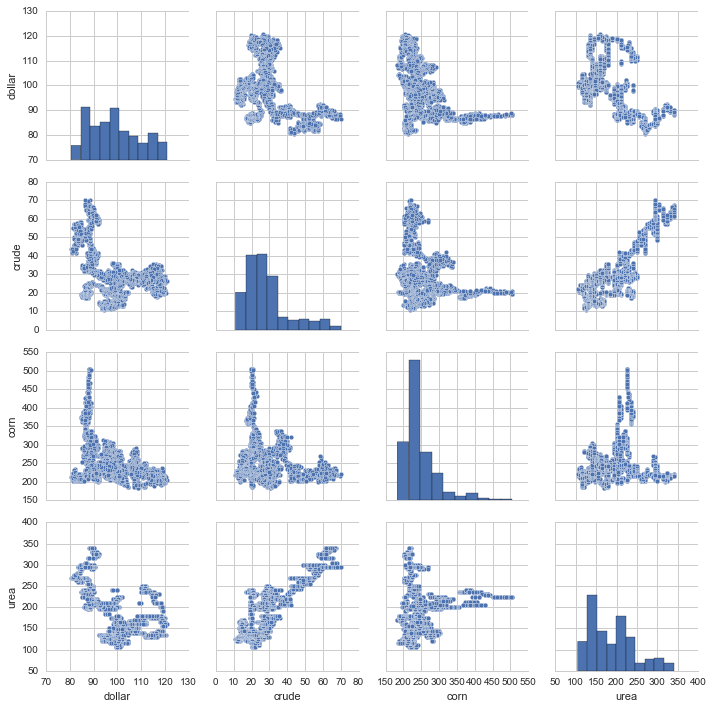

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(sectionold, size=2.5);
plt.show()

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with intercept on dollar, corn, crude for early data
X = sectionold[['dollar','crude', 'corn']]
Y = sectionold[['urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   urea   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     4257.
Date:                Fri, 10 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:30:05   Log-Likelihood:                -17033.
No. Observations:                3653   AIC:                         3.407e+04
Df Residuals:                    3649   BIC:                         3.410e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        137.0734      7.852     17.457      0.000       121.679   152.468
dollar        -1.1225      0.053    -21.049      0.000        -1.227    -1.018
crude          3.4372      0.041     83.107      0.000         3.356     3.518
corn           0.2556      0.011     23.761      0.000         0.234     0.277
==============================================================================
Omnibus:                      139.535   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.948
Skew:                           0.470   Prob(JB):                     5.03e-35
Kurtosis:                       3.393   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


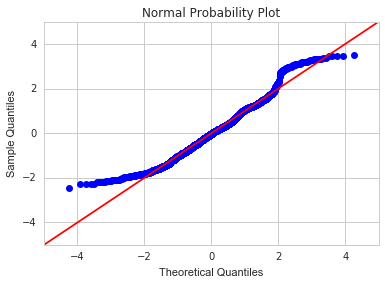

In [23]:
from scipy import stats
res = est.resid

fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [16]:
infl=est.get_influence()
print (infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0    235.000    202.394      0.001      1.273      0.002      0.058      1.273      0.058
         1    235.000    204.241      0.001      1.201      0.002      0.056      1.201      0.056
         2    235.000    204.497      0.001      1.191      0.002      0.056      1.191      0.056
         3    235.000    203.327      0.001      1.236      0.002      0.056      1.237      0.057
         4    235.000    203.638      0.001      1.224      0.002      0.055      1.225      0.055
         5    235.000    203.638      0.001      1.224      0.002      0.055      1.225      0.055
         6    235.000    203.638      0.001      1.224      0.002      0.055      1.225      0.055
         7

In [8]:
statsmodels.stats.outliers_influence.OLSInfluence.summary_frame()
#OLSInfluence.summary_frame()

NameError: name 'statsmodels' is not defined

# Section 1 latedate-2monthurea
[Top](#Table-of-contents)

In [2]:
#look at only columns I want and then got rid of rows that had NaN since there is enough data to do so
section1 = original[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn', '2monthurea']]
section1new = section1.dropna()
section1new.tail()


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
1450,2/19/16,96.600,31.75,369.25,233
1453,2/22/16,97.379,33.39,372.25,234
1454,2/23/16,97.481,33.60,366.75,230
1455,2/24/16,97.458,34.07,364.50,227
1456,2/25/16,97.287,34.83,360.50,234


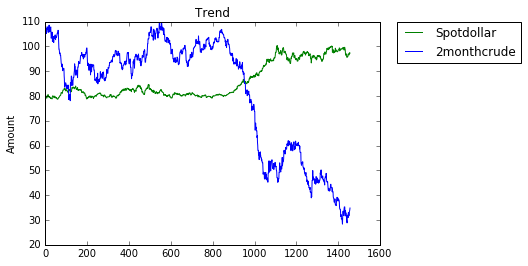

In [3]:
#general trend over time graph
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

#x1 = (original['latedate'])
#x = [datetime.strptime(d, '%m/%d/%Y') for d in x1]
y1 = (original['Spotdollar'])
y2 = (original['2monthcrude'])
y3 = (original['2monthurea'])
plt.figure()
plt.plot(y1,'g')
plt.plot(y2,'b')
#plt.plot(y3,'r')

plt.ylabel('Amount')
plt.title('Trend')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)
plt.show()


In [4]:
#descriptive statistics for section1new
section1new.describe()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
count,985.000000,985.000000,985.000000,985.000000
mean,85.761370,81.614183,503.430711,336.541117
std,7.045145,23.253493,140.272537,68.117296
min,78.709000,28.350000,333.500000,188.000000
25%,80.287000,58.680000,384.750000,286.000000
50%,82.247000,92.630000,450.750000,320.000000
75%,94.201000,98.670000,620.750000,405.000000
max,100.330000,109.520000,838.750000,525.000000


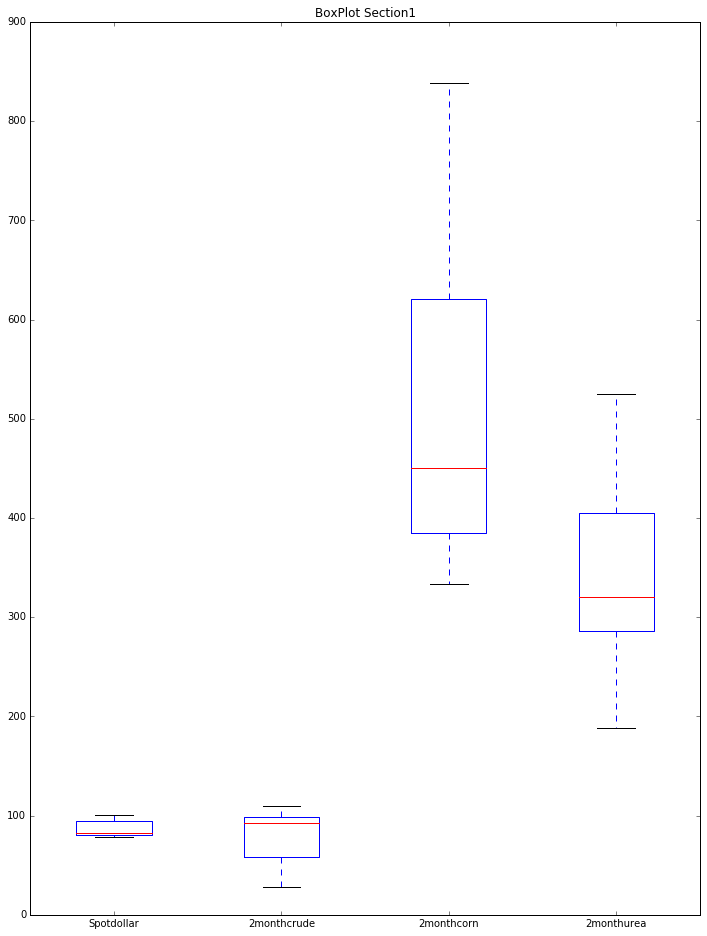

In [5]:
#check normality and outlier using boxplot
import matplotlib.pyplot as plt

plt.show(section1new.plot(kind='box', figsize=(12,16),title=('BoxPlot Section1')))


In [7]:
# pearson correlation matrix
section1new.corr()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
Spotdollar,1.000000,-0.954744,-0.584285,-0.702527
2monthcrude,-0.954744,1.000000,0.496625,0.614779
2monthcorn,-0.584285,0.496625,1.000000,0.784638
2monthurea,-0.702527,0.614779,0.784638,1.000000


In [22]:
#spearman correlation matrix
from scipy import stats
stats.spearmanr(section1new.corr())

SpearmanrResult(correlation=array([[ 1. , -1. , -0.2, -0.4],
       [-1. ,  1. ,  0.2,  0.4],
       [-0.2,  0.2,  1. ,  0.8],
       [-0.4,  0.4,  0.8,  1. ]]), pvalue=array([[ 0. ,  0. ,  0.8,  0.6],
       [ 0. ,  0. ,  0.8,  0.6],
       [ 0.8,  0.8,  0. ,  0.2],
       [ 0.6,  0.6,  0.2,  0. ]]))

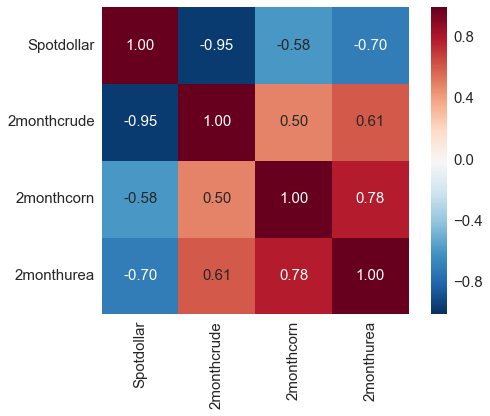

In [8]:
cols= ['Spotdollar', '2monthcrude', '2monthcorn','2monthurea']
cm = np.corrcoef(section1new[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

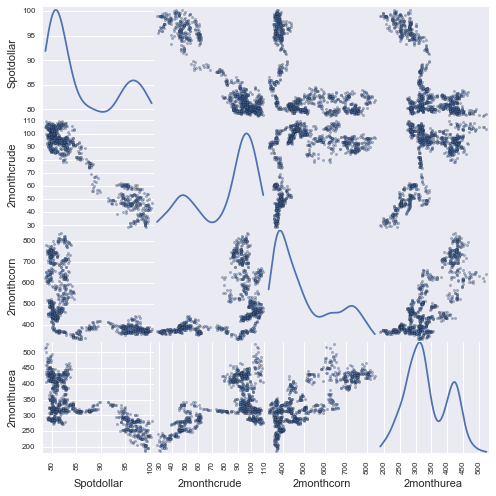

In [17]:
#scatterplot matrix
dataframe = pd.DataFrame(section1new)
scatterplot= pd.scatter_matrix(dataframe,figsize=(8,8),diagonal='kde', marker='.',grid=True)

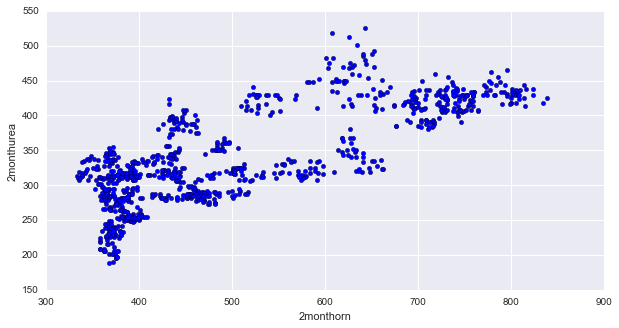

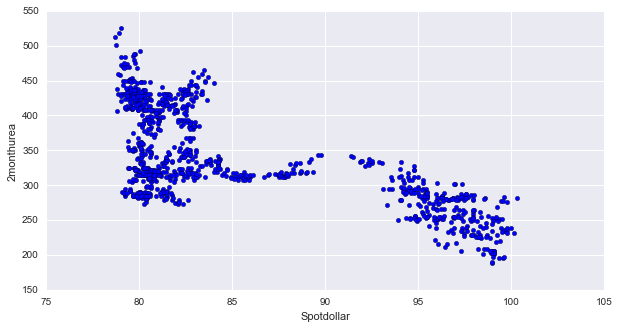

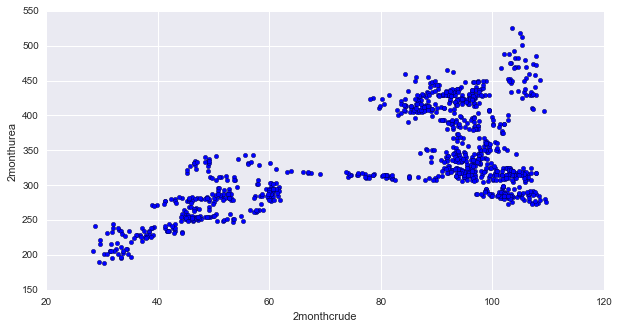

In [23]:
#each individual scatterplot with urea on y axis
plt.figure(figsize=(10,5))
plt.xlabel('2monthorn')
plt.ylabel('2monthurea')
plt.scatter(section1new['2monthcorn'],section1new['2monthurea'])
plt.figure(figsize=(10,5))
plt.xlabel('Spotdollar')
plt.ylabel('2monthurea')
plt.scatter(section1new['Spotdollar'],section1new['2monthurea'])
plt.figure(figsize=(10,5))
plt.xlabel('2monthcrude')
plt.ylabel('2monthurea')
plt.scatter(section1new['2monthcrude'],section1new['2monthurea'])

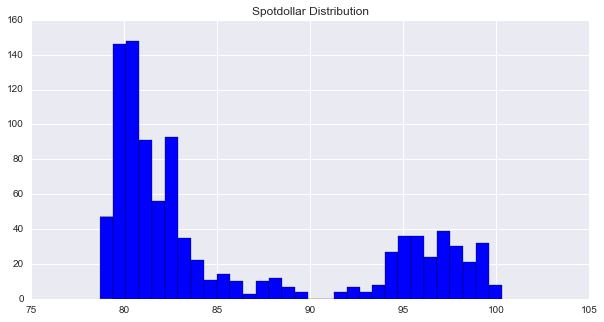

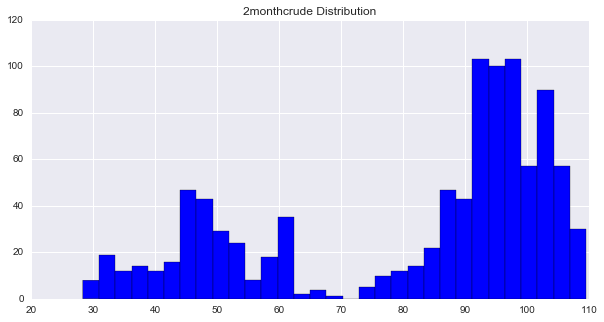

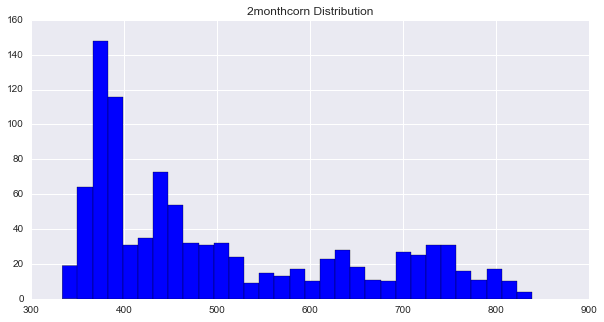

In [21]:
#possible x variable histograms
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(section1new['Spotdollar'],bins=31, color='b') #bins should=sqrt(#obs) 
plt.title('Spotdollar Distribution')
plt.figure(figsize=(10,5))
plt.hist(section1new['2monthcrude'],bins=31, color='b') #bins should=sqrt(#obs) 
plt.title('2monthcrude Distribution')
plt.figure(figsize=(10,5))
plt.hist(section1new['2monthcorn'],bins=31, color='b') #bins should=sqrt(#obs) 
plt.title('2monthcorn Distribution')

In [8]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with intercept on dollar, corn, crude for early data
X = section1new[['Spotdollar','2monthcrude', '2monthcorn']]
Y = section1new[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     806.6
Date:                Fri, 04 Mar 2016   Prob (F-statistic):          3.21e-264
Time:                        08:51:33   Log-Likelihood:                -4942.8
No. Observations:                 985   AIC:                             9894.
Df Residuals:                     981   BIC:                             9913.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         785.9985     68.759     11.431      0.000       651.067   920.930
Spotdollar     -6.0792      0.616     -9.863      0.000        -7.289    -4.870
2monthcrude    -0.7495      0.175     -4.292      0.000        -1.092    -0.407
2monthcorn      0.2643      0.011     24.918      0.000         0.244     0.285
==============================================================================
Omnibus:                        8.007   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.100
Skew:                           0.209   Prob(JB):                       0.0174
Kurtosis:                       2.849   Cond. No.                     3.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with intercept on dollar, corn, crude for early data
X = section1new[['2monthcrude', '2monthcorn']]
Y = section1new[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1058.
Date:                Fri, 04 Mar 2016   Prob (F-statistic):          1.19e-245
Time:                        07:26:19   Log-Likelihood:                -4989.4
No. Observations:                 985   AIC:                             9985.
Df Residuals:                     982   BIC:                             9999.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         109.5622      5.170     21.192      0.000        99.417   119.708
2monthcrude     0.8753      0.061     14.433      0.000         0.756     0.994
2monthcorn      0.3090      0.010     30.732      0.000         0.289     0.329
==============================================================================
Omnibus:                       14.513   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.053
Skew:                           0.259   Prob(JB):                     0.000888
Kurtosis:                       2.729   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


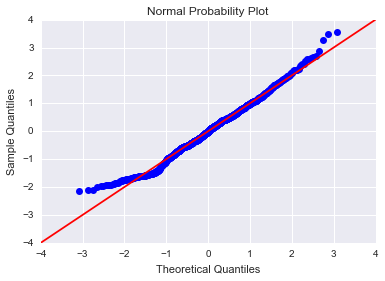

In [34]:
#normal probability plot
res = est.resid

fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [35]:
#ols without crude since highly correlated with the spot dollar
X = section1new[['Spotdollar','2monthcorn']]
Y = section1new[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1180.
Date:                Mon, 29 Feb 2016   Prob (F-statistic):          7.58e-262
Time:                        08:58:31   Log-Likelihood:                -4952.0
No. Observations:                 985   AIC:                             9910.
Df Residuals:                     982   BIC:                             9925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        504.9501     21.181     23.840      0.000       463.385   546.515
Spotdollar    -3.5831      0.206    -17.385      0.000        -3.988    -3.179
2monthcorn     0.2759      0.010     26.651      0.000         0.256     0.296
==============================================================================
Omnibus:                        7.530   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.435
Skew:                           0.188   Prob(JB):                       0.0243
Kurtosis:                       2.800   Cond. No.                     9.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


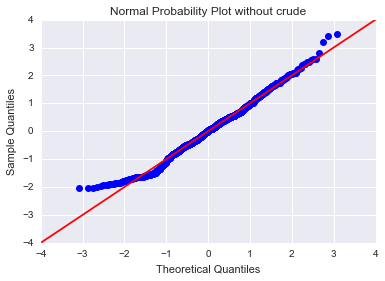

In [37]:
res = est.resid

fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot without crude')
fig.show()

In [38]:
#diagnostic statistics cooks>.004, dfits)>.110, hat>.009, residual>3
#found influential outliers 21,39,40

infl=est.get_influence()
print (infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0    406.000    403.063      0.000      0.080      0.002      0.004      0.080      0.004
         1    411.000    401.138      0.000      0.267      0.002      0.013      0.267      0.013
         2    409.000    403.094      0.000      0.160      0.002      0.008      0.160      0.008
         3    425.000    399.204      0.000      0.699      0.002      0.033      0.698      0.033
         4    430.000    395.548      0.001      0.933      0.002      0.043      0.933      0.043
         5    430.000    396.705      0.001      0.902      0.002      0.042      0.902      0.042
         6    429.000    396.094      0.001      0.891      0.002      0.041      0.891      0.041
         7

In [45]:
#deleting rows 21, 39, 40 which correspond to 29, 56, 57
import pandas as pd
section1new
section1_out = section1new.drop([29, 56, 57])
section1_out

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
0,3/1/12,78.789,109.27,654.00,406
1,3/2/12,79.403,107.17,655.00,411
4,3/5/12,79.300,107.18,660.75,409
5,3/6/12,79.866,105.21,654.00,425
6,3/7/12,79.712,106.65,638.75,430
7,3/8/12,79.139,107.06,635.50,430
8,3/9/12,80.041,107.87,645.00,429
11,3/12/12,79.890,106.84,659.50,433
12,3/13/12,80.193,107.24,662.00,431
13,3/14/12,80.565,105.95,658.75,430


In [46]:
#new ols without the outliers
X = section1_out[['Spotdollar','2monthcorn']]
Y = section1_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1198.
Date:                Mon, 29 Feb 2016   Prob (F-statistic):          8.09e-264
Time:                        09:26:08   Log-Likelihood:                -4921.1
No. Observations:                 982   AIC:                             9848.
Df Residuals:                     979   BIC:                             9863.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        501.8951     20.850     24.071      0.000       460.978   542.812
Spotdollar    -3.5447      0.203    -17.468      0.000        -3.943    -3.147
2monthcorn     0.2747      0.010     26.955      0.000         0.255     0.295
==============================================================================
Omnibus:                       12.552   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.007
Skew:                           0.115   Prob(JB):                       0.0111
Kurtosis:                       2.591   Cond. No.                     9.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 8/1/15 on
[Top](#Table-of-contents)

In [9]:
#look at only columns I want and then got rid of rows that had NaN since there is enough data to do so
china = original[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn', '2monthurea']][1248:1457]
chinanew = china.dropna()
print(chinanew.shape)
chinanew.tail()

(141, 5)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
1450,2/19/16,96.600,31.75,369.25,233
1453,2/22/16,97.379,33.39,372.25,234
1454,2/23/16,97.481,33.60,366.75,230
1455,2/24/16,97.458,34.07,364.50,227
1456,2/25/16,97.287,34.83,360.50,234


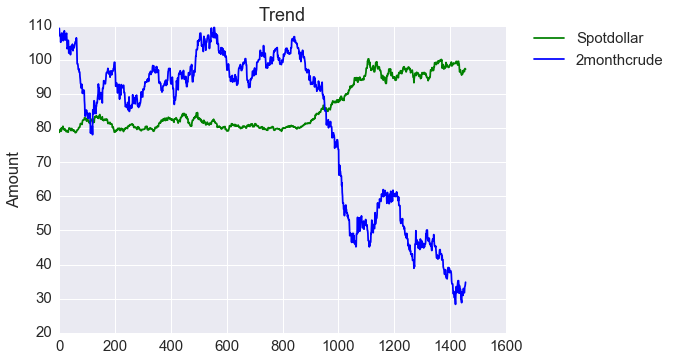

In [10]:
#general trend
#x1 = (original['latedate'])
#x = [datetime.strptime(d, '%m/%d/%Y') for d in x1]
chinay1 = (original['Spotdollar'])
chinay2 = (original['2monthcrude'])
chinay3 = (original['2monthurea'])
plt.figure()
plt.plot(chinay1,'g')
plt.plot(chinay2,'b')
#plt.plot(chinay3,'r')

plt.ylabel('Amount')
plt.title('Trend')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)
plt.show()

In [11]:
#descriptive statistics for section1new
chinanew.describe()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
count,141.000000,141.000000,141.00000,141.000000
mean,97.275035,40.698582,377.83156,241.517730
std,1.598827,5.966633,11.87406,23.041764
min,93.332000,28.350000,357.50000,188.000000
25%,95.985000,35.200000,369.00000,228.000000
50%,97.288000,42.410000,375.00000,245.000000
75%,98.725000,45.920000,387.25000,254.000000
max,100.170000,50.140000,408.50000,283.000000


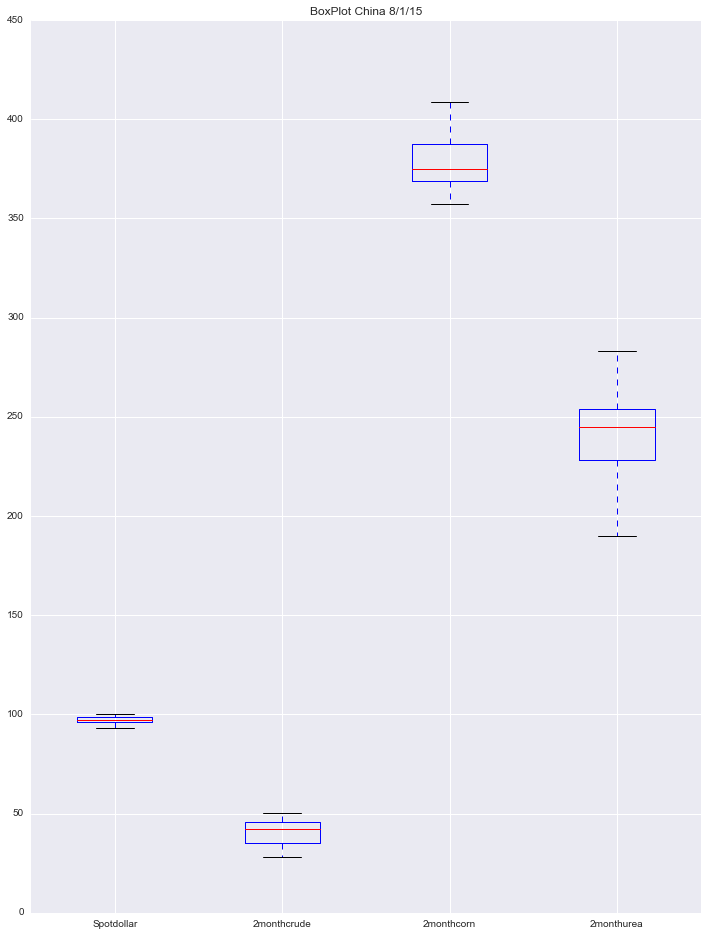

In [59]:
#check normality and outlier using boxplot
import matplotlib.pyplot as plt

plt.show(chinanew.plot(kind='box', figsize=(12,16),title=('BoxPlot China 8/1/15')))

In [58]:
#pearson correlation matrix, unlike before the dollar and crude aren't as correlated
chinanew.corr()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
Spotdollar,1.000000,-0.414365,-0.505570,-0.589453
2monthcrude,-0.414365,1.000000,0.639765,0.772332
2monthcorn,-0.505570,0.639765,1.000000,0.458310
2monthurea,-0.589453,0.772332,0.458310,1.000000


In [60]:
#spearman correlation matrix
from scipy import stats
stats.spearmanr(chinanew.corr())

SpearmanrResult(correlation=array([[ 1. , -0.4, -0.4, -0.8],
       [-0.4,  1. ,  0.4,  0.8],
       [-0.4,  0.4,  1. ,  0.2],
       [-0.8,  0.8,  0.2,  1. ]]), pvalue=array([[ 0. ,  0.6,  0.6,  0.2],
       [ 0.6,  0. ,  0.6,  0.2],
       [ 0.6,  0.6,  0. ,  0.8],
       [ 0.2,  0.2,  0.8,  0. ]]))

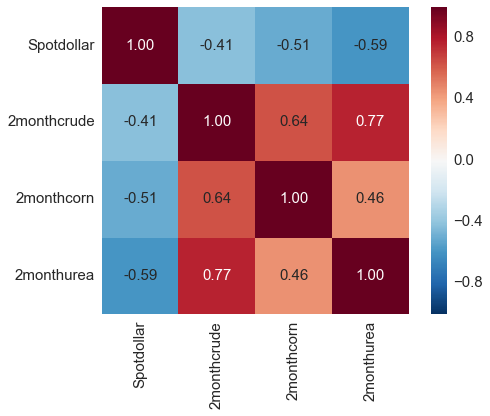

In [12]:
cols= ['Spotdollar', '2monthcrude', '2monthcorn','2monthurea']
cm = np.corrcoef(chinanew[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

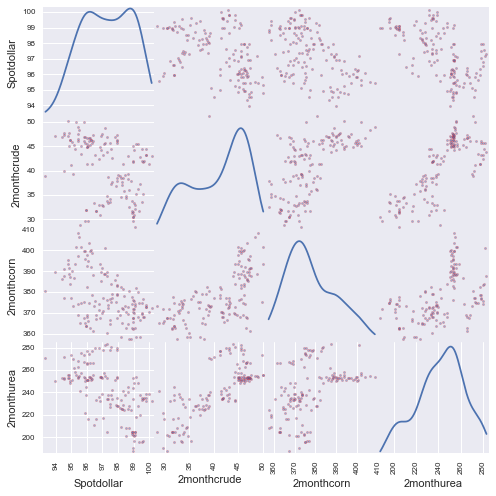

In [69]:
#scatterplot matrix
dataframe = pd.DataFrame(chinanew)
scatterplot= pd.scatter_matrix(dataframe,figsize=(8,8),diagonal='kde', marker='.',grid=True, color= 'r')

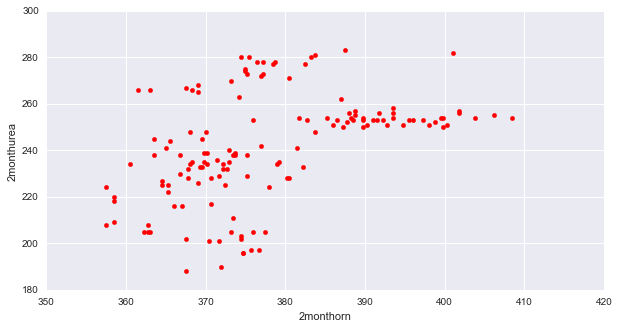

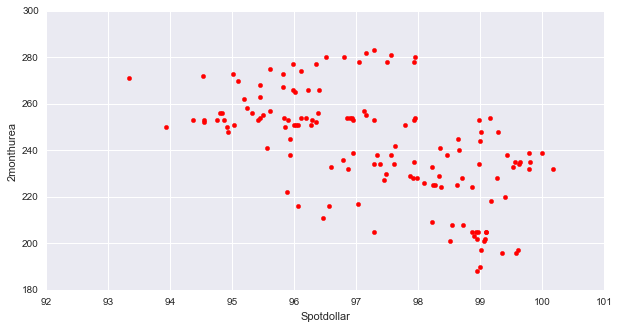

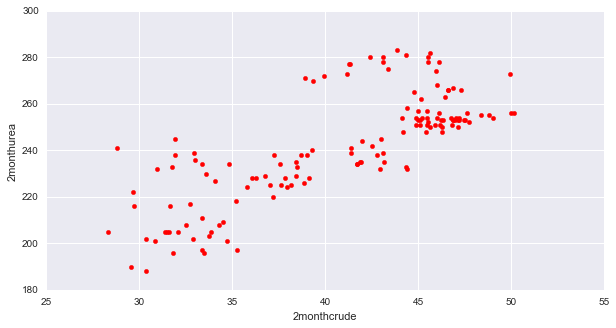

In [68]:
#each individual scatterplot with urea on y axis
plt.figure(figsize=(10,5))
plt.xlabel('2monthorn')
plt.ylabel('2monthurea')
plt.scatter(chinanew['2monthcorn'],chinanew['2monthurea'], color = 'r')
plt.figure(figsize=(10,5))
plt.xlabel('Spotdollar')
plt.ylabel('2monthurea')
plt.scatter(chinanew['Spotdollar'],chinanew['2monthurea'],color = 'r')
plt.figure(figsize=(10,5))
plt.xlabel('2monthcrude')
plt.ylabel('2monthurea')
plt.scatter(chinanew['2monthcrude'],chinanew['2monthurea'],color = 'r')

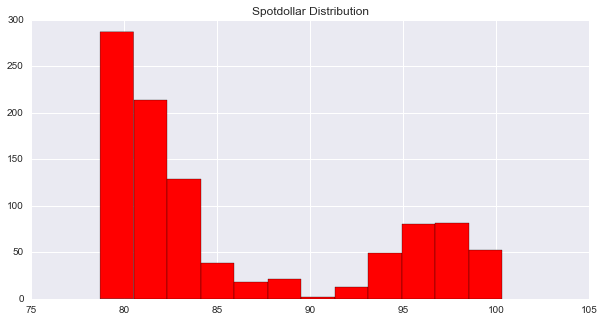

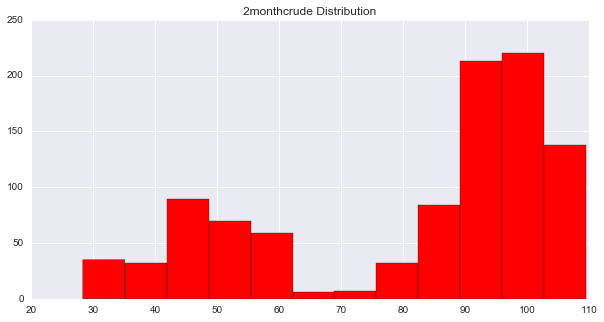

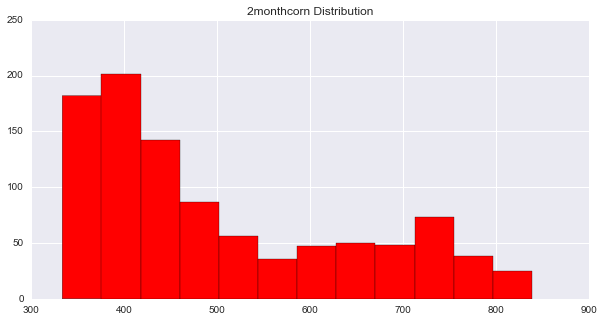

In [70]:
#possible x variable histograms
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(section1new['Spotdollar'],bins=12, color='r') #bins should=sqrt(#obs) 
plt.title('Spotdollar Distribution')
plt.figure(figsize=(10,5))
plt.hist(section1new['2monthcrude'],bins=12, color='r') #bins should=sqrt(#obs) 
plt.title('2monthcrude Distribution')
plt.figure(figsize=(10,5))
plt.hist(section1new['2monthcorn'],bins=12, color='r') #bins should=sqrt(#obs) 
plt.title('2monthcorn Distribution')

In [12]:
#fit a OLS model with intercept on dollar, corn, crude for 8/1/15 to current
X = chinanew[['Spotdollar','2monthcrude', '2monthcorn']]
Y = chinanew[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     111.3
Date:                Fri, 04 Mar 2016   Prob (F-statistic):           1.47e-36
Time:                        08:52:15   Log-Likelihood:                -554.88
No. Observations:                 141   AIC:                             1118.
Df Residuals:                     137   BIC:                             1130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         829.0302    100.691      8.233      0.000       629.922  1028.139
Spotdollar     -5.6036      0.777     -7.211      0.000        -7.140    -4.067
2monthcrude     2.9012      0.234     12.412      0.000         2.439     3.363
2monthcorn     -0.4248      0.124     -3.428      0.001        -0.670    -0.180
==============================================================================
Omnibus:                       16.689   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.712
Skew:                           0.832   Prob(JB):                     8.65e-05
Kurtosis:                       3.646   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


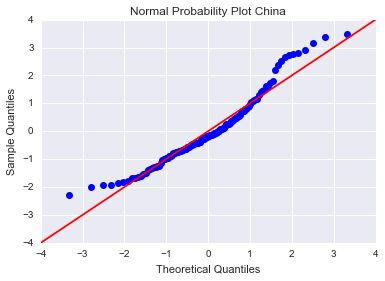

In [72]:
#normal probability plot
res = est.resid

fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot China')
fig.show()

In [73]:
#diagnostics cooks>.028,residual>2.5, dfit>.292, hat>.064
#outliers obs. 4,5
infl=est.get_influence()
print (infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0    278.000    254.960      0.015      1.850      0.017      0.244      1.867      0.247
         1    278.000    253.209      0.020      1.993      0.019      0.280      2.015      0.283
         2    280.000    249.464      0.026      2.452      0.017      0.324      2.498      0.330
         3    281.000    248.013      0.021      2.642      0.012      0.293      2.702      0.300
         4    282.000    246.721      0.094      2.871      0.043      0.612      2.951      0.629
         5    283.000    246.528      0.029      2.923      0.014      0.343      3.008      0.353
         6    280.000    253.735      0.015      2.104      0.013      0.243      2.132      0.246
         7

In [14]:
#deleting rows 4, 5 which correspond to 1257, 1258
import pandas as pd

china_out = chinanew.drop([1257, 1258])
china_out

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
1250,8/3/15,97.494,45.56,376.50,278
1251,8/4/15,97.931,46.13,378.75,278
1252,8/5/15,97.958,45.55,383.25,280
1254,8/7/15,97.563,44.36,383.75,281
1261,8/14/15,96.520,43.11,375.50,280
1264,8/17/15,96.806,42.41,374.50,280
1265,8/18/15,97.040,43.12,377.25,278
1266,8/19/15,96.359,41.27,378.50,277
1267,8/20/15,95.980,41.32,382.50,277
1268,8/21/15,95.008,41.19,377.25,273


In [15]:
#fit a OLS model with intercept on dollar, corn, crude for early data
X = china_out[['Spotdollar','2monthcrude', '2monthcorn']]
Y = china_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     123.8
Date:                Fri, 04 Mar 2016   Prob (F-statistic):           1.43e-38
Time:                        09:59:31   Log-Likelihood:                -538.69
No. Observations:                 139   AIC:                             1085.
Df Residuals:                     135   BIC:                             1097.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         889.9160     96.031      9.267      0.000       699.996  1079.836
Spotdollar     -5.8976      0.735     -8.019      0.000        -7.352    -4.443
2monthcrude     2.9201      0.220     13.252      0.000         2.484     3.356
2monthcorn     -0.5137      0.119     -4.322      0.000        -0.749    -0.279
==============================================================================
Omnibus:                       12.190   Durbin-Watson:                   0.274
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.697
Skew:                           0.697   Prob(JB):                      0.00175
Kurtosis:                       3.501   Cond. No.                     3.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


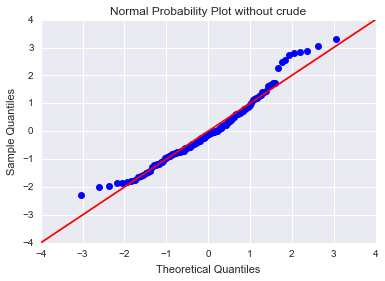

In [78]:
res = est.resid

fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot without crude')
fig.show()

In [16]:
#fit a OLS model with intercept on dollar, corn, crude for early data
X = china_out[['Spotdollar','2monthcrude']]
Y = china_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     156.0
Date:                Fri, 04 Mar 2016   Prob (F-statistic):           6.21e-36
Time:                        10:00:05   Log-Likelihood:                -547.70
No. Observations:                 139   AIC:                             1101.
Df Residuals:                     136   BIC:                             1110.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         607.4969     74.808      8.121      0.000       459.560   755.434
Spotdollar     -4.7721      0.731     -6.527      0.000        -6.218    -3.326
2monthcrude     2.4025      0.197     12.219      0.000         2.014     2.791
==============================================================================
Omnibus:                        9.881   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.088
Skew:                           0.650   Prob(JB):                      0.00645
Kurtosis:                       3.225   Cond. No.                     7.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Green Markets
[Top](#Table-of-contents)

In [2]:
#look at only columns I want and then got rid of rows that had NaN since there is enough data to do so
green = original[['latestdate', 'crude.1', 'urea.1']][0:755]
print(green.shape)
green.head()

(755, 3)


,latestdate,crude.1,urea.1
0,2/1/14,96.71,450
1,2/2/14,96.71,450
2,2/3/14,95.72,450
3,2/4/14,96.46,450
4,2/5/14,96.76,450


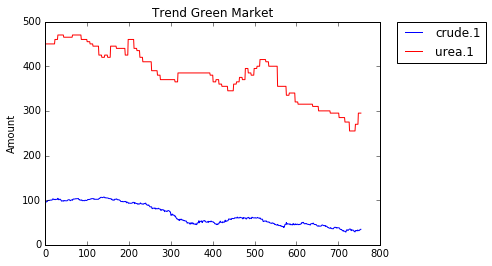

In [7]:
#trend for green market
#x1 = (green['latestdate'])
#x = [datetime.strptime(d, '%m/%d/%Y') for d in x1]
import matplotlib.pyplot as plt
%matplotlib inline
y1 = (green['crude.1'])
y2 = (green['urea.1'])
plt.figure()
plt.plot(y1,'b')
plt.plot(y2,'r')

plt.ylabel('Amount')
plt.title('Trend Green Market')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)
plt.show()


In [10]:
p = bkh.figure()
p.line(x=y2,y=y1)
bkh.show(p)

In [95]:
green.describe()

,crude.1,urea.1
count,755.000000,755.000000
mean,67.265894,382.688742
std,24.808647,57.373917
min,28.350000,255.000000
25%,46.610000,345.000000
50%,58.530000,385.000000
75%,96.630000,435.000000
max,106.830000,470.000000


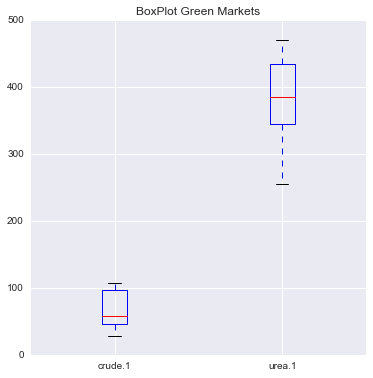

In [91]:
#check normality and outlier using boxplot
import matplotlib.pyplot as plt

plt.show(green.plot(kind='box', figsize=(6,6),title=('BoxPlot Green Markets')))

In [92]:
# pearson correlation matrix
green.corr()

,crude.1,urea.1
crude.1,1.000000,0.876619
urea.1,0.876619,1.000000


In [93]:
#spearman correlation matrix
from scipy import stats
stats.spearmanr(green.corr())

SpearmanrResult(correlation=-1.0, pvalue=nan)

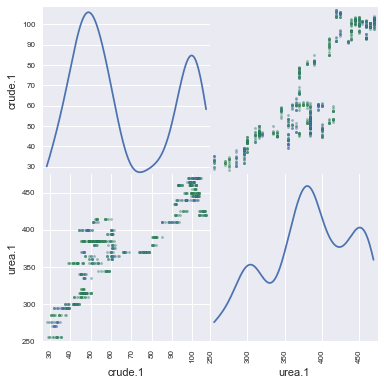

In [98]:
#scatterplot matrix
dataframe = pd.DataFrame(green)
scatterplot= pd.scatter_matrix(dataframe,figsize=(6,6),diagonal='kde', marker='.',grid=True, color='g')

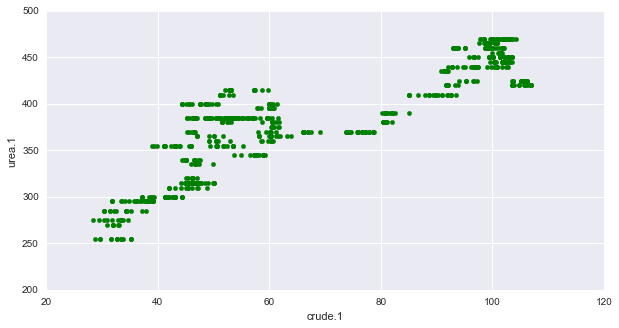

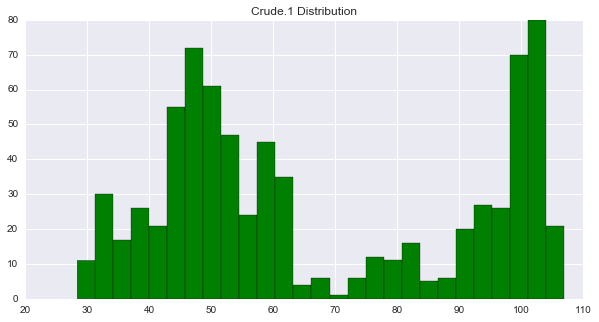

In [99]:
#each individual scatterplot with urea on y axis and histogram for green market
plt.figure(figsize=(10,5))
plt.xlabel('crude.1')
plt.ylabel('urea.1')
plt.scatter(green['crude.1'],green['urea.1'], color='g')
plt.figure(figsize=(10,5))
plt.hist(green['crude.1'],bins=27, color='g') #bins should=sqrt(#obs) 
plt.title('Crude.1 Distribution')

In [100]:
#fit a OLS model with intercept on dollar, corn, crude for green markets
X = green[['crude.1']]
Y = green[['urea.1']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 urea.1   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     2499.
Date:                Mon, 29 Feb 2016   Prob (F-statistic):          2.00e-241
Time:                        10:48:50   Log-Likelihood:                -3576.0
No. Observations:                 755   AIC:                             7156.
Df Residuals:                     753   BIC:                             7165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        246.3192      2.907     84.726      0.000       240.612   252.026
crude.1        2.0273      0.041     49.992      0.000         1.948     2.107
==============================================================================
Omnibus:                       41.335   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.067
Skew:                           0.247   Prob(JB):                     1.61e-05
Kurtosis:                       2.323   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


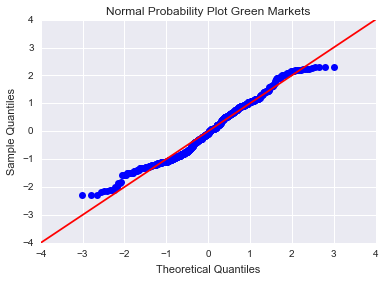

In [101]:
#normal probability plot
res = est.resid

fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot Green Markets')
fig.show()

In [102]:
#green markets diagnostics cooks>.005,dfit>.073,hat>.004, residual>2
infl=est.get_influence()
print (infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0    450.000    442.381      0.000      0.276      0.003      0.016      0.276      0.016
         1    450.000    442.381      0.000      0.276      0.003      0.016      0.276      0.016
         2    450.000    440.374      0.000      0.349      0.003      0.019      0.349      0.019
         3    450.000    441.875      0.000      0.295      0.003      0.017      0.294      0.017
         4    450.000    442.483      0.000      0.273      0.003      0.015      0.272      0.015
         5    450.000    443.618      0.000      0.231      0.003      0.013      0.231      0.013
         6    450.000    447.733      0.000      0.082      0.004      0.005      0.082      0.005
         7

In [105]:
#deleting rows 140, 141, 740 which correspond to 142, 143, 742
import pandas as pd

green_out = green.drop([142, 143, 742])
print(green_out.shape)

(752, 3)


In [106]:
#fit a OLS model with intercept on dollar, corn, crude for early data
X = green_out[['crude.1']]
Y = green_out[['urea.1']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 urea.1   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     2491.
Date:                Mon, 29 Feb 2016   Prob (F-statistic):          1.41e-240
Time:                        11:47:00   Log-Likelihood:                -3560.5
No. Observations:                 752   AIC:                             7125.
Df Residuals:                     750   BIC:                             7134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        246.2886      2.913     84.558      0.000       240.571   252.007
crude.1        2.0300      0.041     49.913      0.000         1.950     2.110
==============================================================================
Omnibus:                       39.931   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.618
Skew:                           0.246   Prob(JB):                     2.02e-05
Kurtosis:                       2.330   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


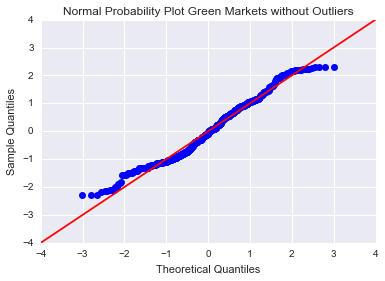

In [107]:
#normal probability plot
res = est.resid

fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot Green Markets without Outliers')
fig.show()

# Temp and Precipitation Included
[Top](#Table-of-contents)

In [3]:
import pandas as pd

original_2 = pd.read_csv("C:/Users/msteinme/Documents/project1revisit2csv.csv")
prectemp = original_2[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn', '2monthurea', 'precipitation', 'temp']][0:1403]
prec_temp = prectemp.dropna()
prec_temp.head()

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,precipitation,temp
0,3/1/2012,78.789,109.27,654.00,406,5.18,76.2
1,3/2/2012,79.403,107.17,655.00,411,5.18,76.2
4,3/5/2012,79.300,107.18,660.75,409,5.18,76.2
5,3/6/2012,79.866,105.21,654.00,425,5.18,76.2
6,3/7/2012,79.712,106.65,638.75,430,5.18,76.2


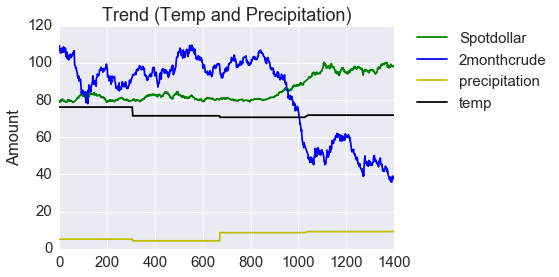

In [14]:
#general trend over time graph
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

#x1 = (prec_temp['latedate'])
#x = [datetime.strptime(d, '%m/%d/%Y') for d in x1]
y1 = (prec_temp['Spotdollar'])
y2 = (prec_temp['2monthcrude'])
y3 = (prec_temp['2monthurea'])
y4 = (prec_temp['precipitation'])
y5 = (prec_temp['temp'])
plt.figure()
plt.plot(y1,'g')
plt.plot(y2,'b')
#plt.plot(y3,'r')
plt.plot(y4,'y')
plt.plot(y5,'k')
plt.ylabel('Amount')
plt.title('Trend (Temp and Precipitation)')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)
plt.show()

In [26]:
#descriptive statistics for prec_temp
prec_temp.describe()

,Spotdollar,2monthcrude,2monthcorn,2monthurea,precipitation,temp
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,85.257369,83.634947,509.021406,341.577167,6.892082,72.434556
std,6.722864,21.438698,140.345155,64.655693,2.160965,2.070016
min,78.709000,35.810000,333.500000,224.000000,4.290000,70.700000
25%,80.252500,60.917500,388.062500,289.000000,4.290000,70.700000
50%,81.959500,93.160000,455.625000,323.000000,8.670000,71.500000
75%,90.976000,99.005000,627.437500,408.000000,9.112500,71.870000
max,100.330000,109.520000,838.750000,525.000000,9.260000,76.200000


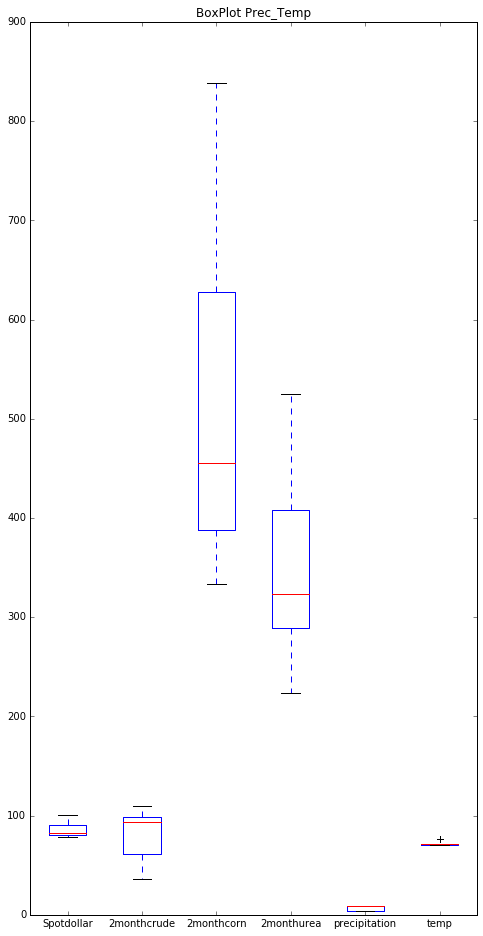

In [23]:
#check normality and outlier using boxplot
import matplotlib.pyplot as plt

plt.show(prec_temp.plot(kind='box', figsize=(8,16),title=('BoxPlot Prec_Temp')))

In [15]:
#pearson correlation matrix
prec_temp.corr()

,Spotdollar,2monthcrude,2monthcorn,2monthurea,precipitation,temp
Spotdollar,1.000000,-0.951538,-0.561765,-0.658611,0.652539,-0.221311
2monthcrude,-0.951538,1.000000,0.465711,0.545813,-0.629632,0.109884
2monthcorn,-0.561765,0.465711,1.000000,0.782021,-0.720571,0.690661
2monthurea,-0.658611,0.545813,0.782021,1.000000,-0.549836,0.679980
precipitation,0.652539,-0.629632,-0.720571,-0.549836,1.000000,-0.438555
temp,-0.221311,0.109884,0.690661,0.679980,-0.438555,1.000000


In [27]:
#spearman correlation matrix
from scipy import stats
stats.spearmanr(prec_temp.corr())

SpearmanrResult(correlation=array([[ 1.        , -1.        , -0.54285714, -0.65714286,  0.77142857,
        -0.37142857],
       [-1.        ,  1.        ,  0.54285714,  0.65714286, -0.77142857,
         0.37142857],
       [-0.54285714,  0.54285714,  1.        ,  0.88571429, -0.82857143,
         0.82857143],
       [-0.65714286,  0.65714286,  0.88571429,  1.        , -0.65714286,
         0.71428571],
       [ 0.77142857, -0.77142857, -0.82857143, -0.65714286,  1.        ,
        -0.6       ],
       [-0.37142857,  0.37142857,  0.82857143,  0.71428571, -0.6       ,
         1.        ]]), pvalue=array([[ 0.        ,  0.        ,  0.26570262,  0.15617493,  0.0723965 ,
         0.46847813],
       [ 0.        ,  0.        ,  0.26570262,  0.15617493,  0.0723965 ,
         0.46847813],
       [ 0.26570262,  0.26570262,  0.        ,  0.01884548,  0.04156268,
         0.04156268],
       [ 0.15617493,  0.15617493,  0.01884548,  0.        ,  0.15617493,
         0.11078717],
       [ 0.07

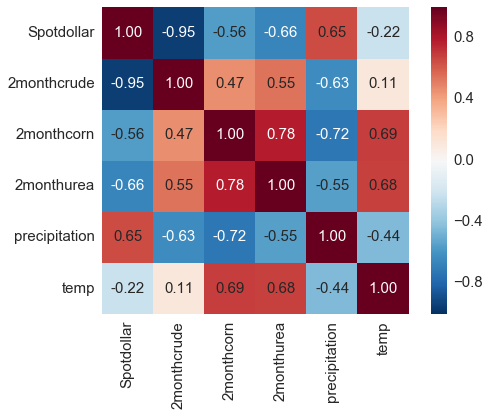

In [16]:
cols= ['Spotdollar', '2monthcrude', '2monthcorn','2monthurea','precipitation', 'temp']
cm = np.corrcoef(prec_temp[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

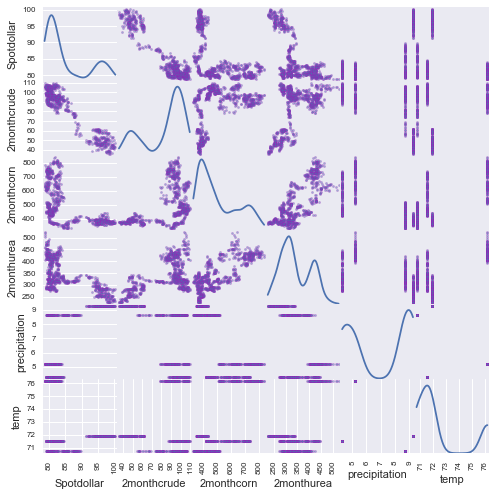

In [12]:
#scatterplot matrix
dataframe = pd.DataFrame(prec_temp)
scatterplot= pd.scatter_matrix(dataframe,figsize=(8,8),diagonal='kde', marker='.',grid=True, color='m')

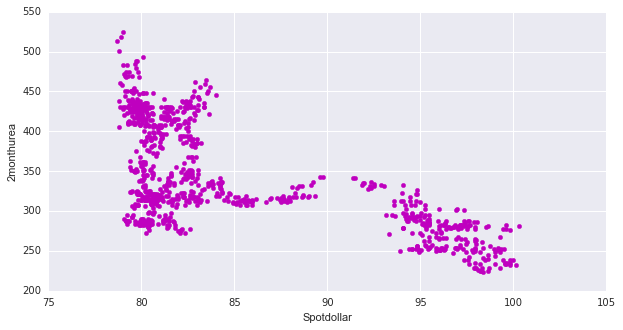

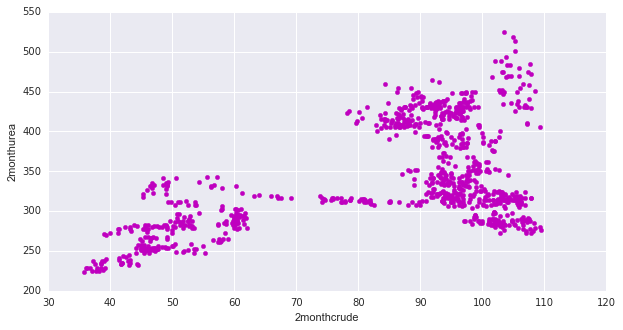

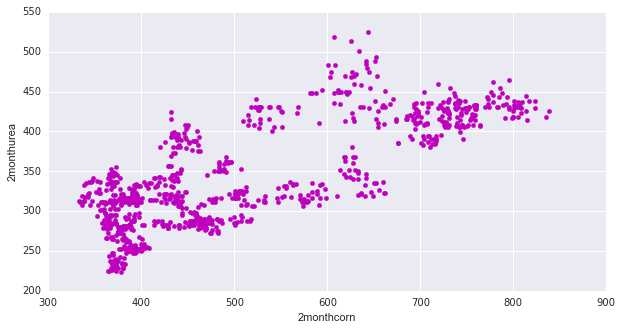

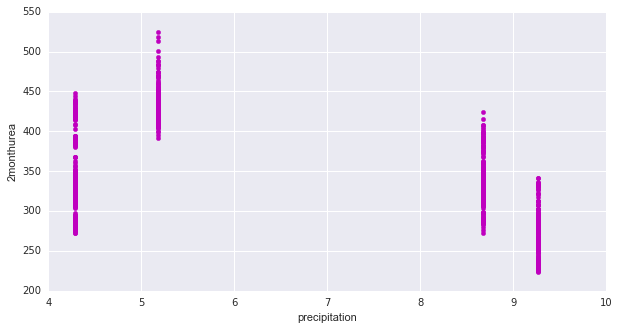

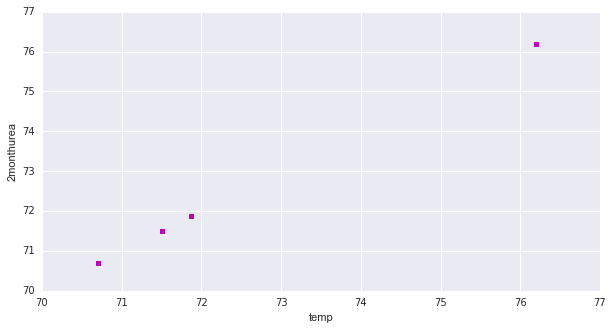

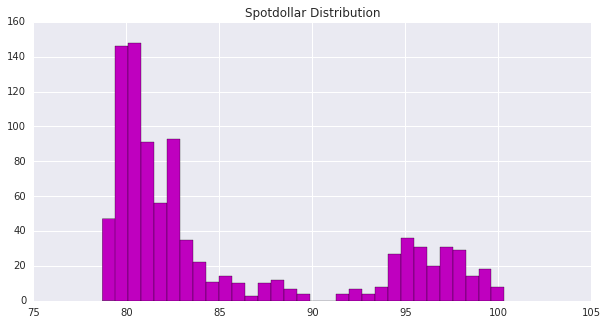

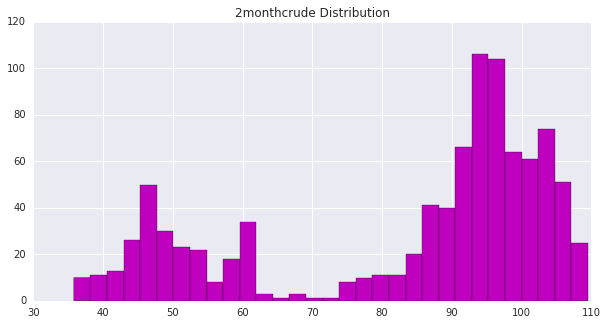

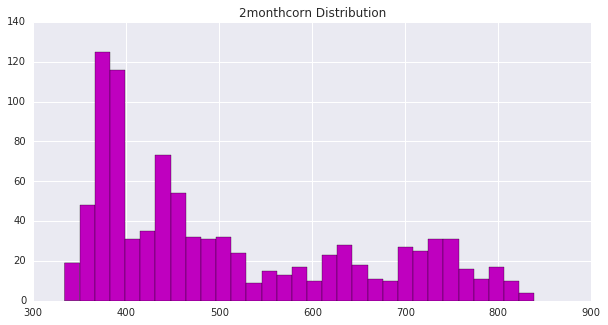

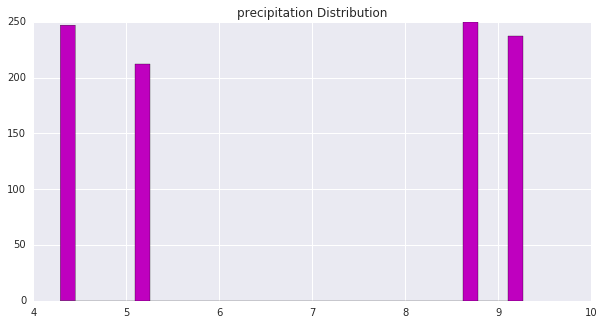

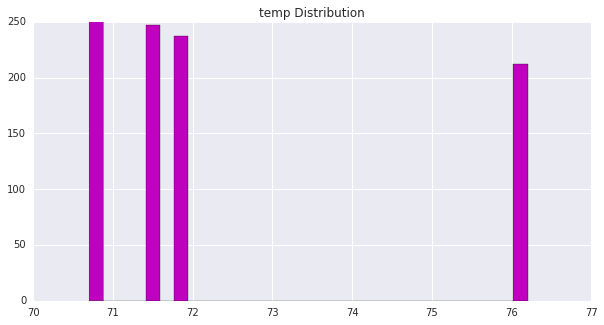

In [13]:
#each individual scatterplot with urea on y axis and histograms for prec_temp
plt.figure(figsize=(10,5))
plt.xlabel('Spotdollar')
plt.ylabel('2monthurea')
plt.scatter(prec_temp['Spotdollar'],prec_temp['2monthurea'], color='m')
plt.figure(figsize=(10,5))
plt.xlabel('2monthcrude')
plt.ylabel('2monthurea')
plt.scatter(prec_temp['2monthcrude'],prec_temp['2monthurea'], color='m')
plt.figure(figsize=(10,5))
plt.xlabel('2monthcorn')
plt.ylabel('2monthurea')
plt.scatter(prec_temp['2monthcorn'],prec_temp['2monthurea'], color='m')
plt.figure(figsize=(10,5))
plt.xlabel('precipitation')
plt.ylabel('2monthurea')
plt.scatter(prec_temp['precipitation'],prec_temp['2monthurea'], color='m')
plt.figure(figsize=(10,5))
plt.xlabel('temp')
plt.ylabel('2monthurea')
plt.scatter(prec_temp['temp'],prec_temp['temp'], color='m')
plt.figure(figsize=(10,5))
plt.hist(prec_temp['Spotdollar'],bins=31, color='m')
plt.title('Spotdollar Distribution')
plt.figure(figsize=(10,5))
plt.hist(prec_temp['2monthcrude'],bins=31, color='m')
plt.title('2monthcrude Distribution')
plt.figure(figsize=(10,5))
plt.hist(prec_temp['2monthcorn'],bins=31, color='m')
plt.title('2monthcorn Distribution')
plt.figure(figsize=(10,5))
plt.hist(prec_temp['precipitation'],bins=31, color='m')
plt.title('precipitation Distribution')
plt.figure(figsize=(10,5))
plt.hist(prec_temp['temp'],bins=31, color='m')
plt.title('temp Distribution')

In [29]:
#fit a OLS model with intercept on dollar, corn, crude, precipitation, temp for section 1
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = prec_temp[['Spotdollar','2monthcrude', '2monthcorn', 'precipitation', 'temp']]
Y = prec_temp[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     679.4
Date:                Wed, 09 Mar 2016   Prob (F-statistic):          4.23e-309
Time:                        12:57:36   Log-Likelihood:                -4562.5
No. Observations:                 946   AIC:                             9137.
Df Residuals:                     940   BIC:                             9166.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -110.8945     82.229     -1.349      0.178      -272.267    50.478
Spotdollar       -6.1584      0.532    -11.576      0.000        -7.202    -5.114
2monthcrude      -0.4330      0.163     -2.651      0.008        -0.753    -0.112
2monthcorn        0.1758      0.013     13.157      0.000         0.150     0.202
precipitation     6.6678      0.749      8.897      0.000         5.197     8.139
temp             12.1252      0.700     17.322      0.000        10.751    13.499
==============================================================================
Omnibus:                       11.323   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.469
Skew:                           0.124   Prob(JB):                       0.0145
Kurtosis:                       2.609   Cond. No.                     4.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


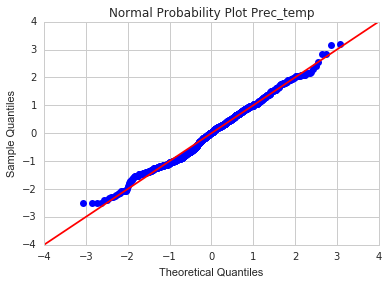

In [30]:
#normal probability plot
res = est.resid

fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot Prec_temp')
fig.show()

In [20]:
#cooks>.004, dfits>abs(.145), hat>.016, residual>abs(2.8)
infl=est.get_influence()
print (infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0    406.000    430.042      0.001     -0.800      0.008     -0.073     -0.800     -0.073
         1    411.000    427.346      0.000     -0.544      0.008     -0.049     -0.544     -0.049
         2    409.000    428.987      0.001     -0.665      0.008     -0.059     -0.665     -0.059
         3    425.000    425.168      0.000     -0.006      0.007     -0.000     -0.006     -0.000
         4    430.000    422.811      0.000      0.239      0.008      0.022      0.239      0.022
         5    430.000    425.591      0.000      0.147      0.008      0.013      0.147      0.013
         6    429.000    421.356      0.000      0.254      0.009      0.025      0.254      0.025
         7

In [31]:
#prec and temp highly correlated to each other, and the same as crude and dollar so I will make a model without crude and precip
X = prec_temp[['Spotdollar','2monthcorn','temp']]
Y = prec_temp[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     990.3
Date:                Wed, 09 Mar 2016   Prob (F-statistic):          1.09e-290
Time:                        12:57:50   Log-Likelihood:                -4612.2
No. Observations:                 946   AIC:                             9232.
Df Residuals:                     942   BIC:                             9252.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -285.5929     46.940     -6.084      0.000      -377.712  -193.474
Spotdollar    -4.0199      0.194    -20.775      0.000        -4.400    -3.640
2monthcorn     0.1246      0.012      9.969      0.000         0.100     0.149
temp          12.5143      0.719     17.407      0.000        11.103    13.925
==============================================================================
Omnibus:                       13.649   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.980
Skew:                           0.180   Prob(JB):                      0.00413
Kurtosis:                       2.615   Cond. No.                     2.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


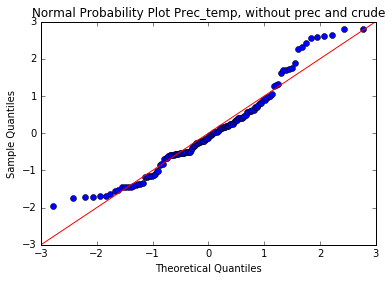

In [18]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot Prec_temp, without prec and crude')
fig.show()

In [32]:
#deleting rows 21,39,40 which correspond to 29,56,57
import pandas as pd
prectemp_out = prec_temp.drop([29, 56, 57])
print(prectemp_out.shape)

(943, 7)


In [36]:
#fit a OLS model with intercept on dollar, corn, crude, precip, temp 
X = prectemp_out[['Spotdollar', '2monthcrude', '2monthcorn', 'precipitation', 'temp']]
Y = prectemp_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     683.0
Date:                Wed, 09 Mar 2016   Prob (F-statistic):          1.78e-309
Time:                        13:37:48   Log-Likelihood:                -4535.0
No. Observations:                 943   AIC:                             9082.
Df Residuals:                     937   BIC:                             9111.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           -72.0317     81.413     -0.885      0.377      -231.806    87.742
Spotdollar       -6.2179      0.525    -11.849      0.000        -7.248    -5.188
2monthcrude      -0.4731      0.161     -2.934      0.003        -0.789    -0.157
2monthcorn        0.1794      0.013     13.595      0.000         0.154     0.205
precipitation     6.6285      0.739      8.968      0.000         5.178     8.079
temp             11.6794      0.695     16.799      0.000        10.315    13.044
==============================================================================
Omnibus:                       20.494   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.473
Skew:                           0.059   Prob(JB):                      0.00323
Kurtosis:                       2.473   Cond. No.                     4.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#fit a OLS model with intercept on dollar, corn, crude, precip, temp 
X = prectemp_out[['Spotdollar', 'precipitation', 'temp']]
Y = prectemp_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     873.9
Date:                Wed, 09 Mar 2016   Prob (F-statistic):          3.50e-271
Time:                        12:58:36   Log-Likelihood:                -4630.6
No. Observations:                 943   AIC:                             9269.
Df Residuals:                     939   BIC:                             9289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -517.5252     44.965    -11.510      0.000      -605.768  -429.282
Spotdollar       -5.6282      0.211    -26.639      0.000        -6.043    -5.214
precipitation     2.7201      0.713      3.816      0.000         1.321     4.119
temp             18.2227      0.581     31.378      0.000        17.083    19.362
==============================================================================
Omnibus:                       31.423   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.698
Skew:                           0.449   Prob(JB):                     4.81e-08
Kurtosis:                       3.229   Cond. No.                     4.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#fit a OLS model with intercept on dollar, corn, crude, precip, temp 
X = prectemp_out[['Spotdollar', '2monthcorn', 'precipitation', 'temp']]
Y = prectemp_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     844.8
Date:                Wed, 09 Mar 2016   Prob (F-statistic):          4.16e-309
Time:                        13:39:13   Log-Likelihood:                -4539.3
No. Observations:                 943   AIC:                             9089.
Df Residuals:                     938   BIC:                             9113.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          -272.7029     44.345     -6.150      0.000      -359.730  -185.676
Spotdollar       -4.7942      0.201    -23.886      0.000        -5.188    -4.400
2monthcorn        0.1854      0.013     14.160      0.000         0.160     0.211
precipitation     7.1615      0.719      9.955      0.000         5.750     8.573
temp             12.1354      0.680     17.835      0.000        10.800    13.471
==============================================================================
Omnibus:                       20.405   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.835
Skew:                           0.087   Prob(JB):                      0.00269
Kurtosis:                       2.480   Cond. No.                     2.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X = prectemp_out[['Spotdollar', '2monthcorn', 'temp']]
Y = prectemp_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     989.9
Date:                Wed, 09 Mar 2016   Prob (F-statistic):          3.38e-290
Time:                        13:39:47   Log-Likelihood:                -4586.6
No. Observations:                 943   AIC:                             9181.
Df Residuals:                     939   BIC:                             9201.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -264.2950     46.595     -5.672      0.000      -355.738  -172.852
Spotdollar    -3.9598      0.192    -20.661      0.000        -4.336    -3.584
2monthcorn     0.1286      0.012     10.383      0.000         0.104     0.153
temp          12.1178      0.715     16.946      0.000        10.714    13.521
==============================================================================
Omnibus:                       17.525   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.580
Skew:                           0.133   Prob(JB):                      0.00306
Kurtosis:                       2.526   Cond. No.                     2.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X = prectemp_out[['Spotdollar', '2monthcorn', 'precipitation']]
Y = prectemp_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     762.8
Date:                Wed, 09 Mar 2016   Prob (F-statistic):          3.77e-251
Time:                        13:40:11   Log-Likelihood:                -4677.0
No. Observations:                 943   AIC:                             9362.
Df Residuals:                     939   BIC:                             9381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           452.4482     20.473     22.100      0.000       412.270   492.626
Spotdollar       -3.8688      0.224    -17.253      0.000        -4.309    -3.429
2monthcorn        0.3329      0.012     28.364      0.000         0.310     0.356
precipitation     7.1282      0.832      8.567      0.000         5.495     8.761
==============================================================================
Omnibus:                       11.697   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.877
Skew:                           0.249   Prob(JB):                      0.00264
Kurtosis:                       3.234   Cond. No.                     9.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X = prectemp_out[['2monthcrude', '2monthcorn', 'temp']]
Y = prectemp_out[['2monthurea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             2monthurea   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     846.8
Date:                Wed, 09 Mar 2016   Prob (F-statistic):          1.81e-266
Time:                        13:40:33   Log-Likelihood:                -4641.5
No. Observations:                 943   AIC:                             9291.
Df Residuals:                     939   BIC:                             9310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        -713.0321     53.116    -13.424      0.000      -817.273  -608.792
2monthcrude     1.0092      0.061     16.636      0.000         0.890     1.128
2monthcorn      0.1620      0.013     12.722      0.000         0.137     0.187
temp           12.2522      0.772     15.873      0.000        10.737    13.767
==============================================================================
Omnibus:                       21.069   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.991
Skew:                           0.247   Prob(JB):                     0.000204
Kurtosis:                       2.567   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""